# Folha_7

[1.16969697 1.23636364]
0.952538038613988


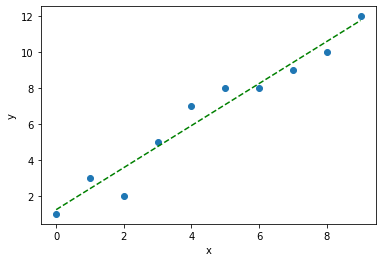

In [3]:
#Exercicio 1
import numpy as np

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])


p1 = np.polyfit(x,y,1) 

yfit = p1[0] * x + p1[1] 
yresid = y - yfit 
SQresid = sum(pow(yresid,2)) 
SQtotal = len(y) * np.var(y) 
R2 = 1 - SQresid/SQtotal 

print(p1) # imprime a interceção e a inclinação
print(R2) # imprime coeficiente de correlação

import matplotlib.pyplot as plt

plt.plot(x,y,'o')
plt.plot(x,np.polyval(p1,x),'g--')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

1024
1024


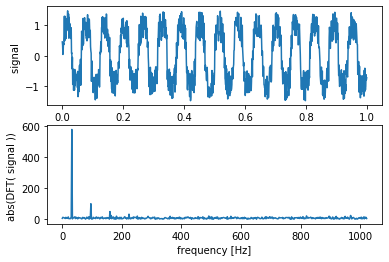

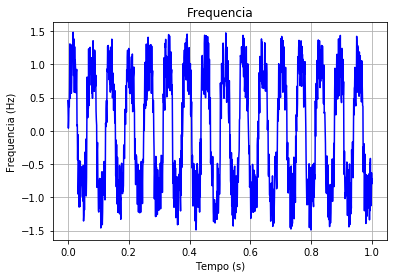

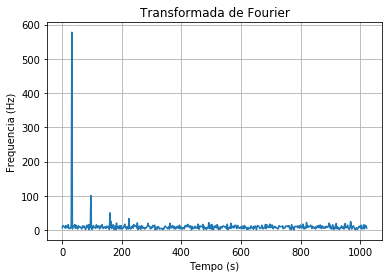

In [4]:
#Exercicio 2
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import scipy

pi = scipy .pi


#importação dos dados do ficheiro externo para a matriz dat
dat=np.loadtxt("F7exer01.txt")

n = len(dat)
print (n)
x=np.linspace(0,1,n)
m = len(x)
print (m)

signal_length = 0.5 #[ seconds ]
sample_rate =500 # sampling rate [Hz]

dt = 1./ sample_rate # time between two samples [s]
df = 1/ signal_length # frequency between points in frequency domain [Hz]
t=x
n_t=len(t) # length of time vector
# create signal
#y= scipy .sin (2* pi *50* t)+ scipy .sin (2* pi *70* t+pi /4)
y= dat
# compute fourier transform
f= scipy .fft(y)
# work out meaningful frequencies in fourier transform
freqs =df* scipy . arange (0 ,( n_t -1)/2. , dtype ="d") #d= double precision float
n_freq = len ( freqs )
# plot input data y against time
plt. subplot (2 ,1 ,1)
#plt.close('all')
#plt.figure()
#plt. plot (2 ,1, 1)
plt. plot (t,y, label ='input data')
plt. xlabel ('time [s]')
plt. ylabel ('signal ')
# plot frequency spectrum
plt. subplot (2 ,1 ,2)
#plt.figure()
#plt. plot (2 ,1, 2 )
plt. plot (freqs ,abs(f[0: n_freq ]),
label ='abs( fourier transform )')
plt. xlabel ('frequency [Hz]')
plt. ylabel ('abs(DFT( signal )) ')
# save plot to disk
#plt. savefig ('fft1.jpg')
plt. show () #and display plot on screen

plt.close('all')
plt.figure()
plt.title("Frequencia")
plt.plot(x,y,'b');
plt.xlabel('Tempo (s)')
plt.ylabel('Frequencia (Hz)')
plt.grid(True)

plt.figure()
plt.title("Transformada de Fourier")
plt.plot(freqs ,abs(f[0: n_freq ]),
label ='abs( fourier transform )')
plt.xlabel('Tempo (s)')
plt.ylabel('Frequencia (Hz)')
plt.grid(True)

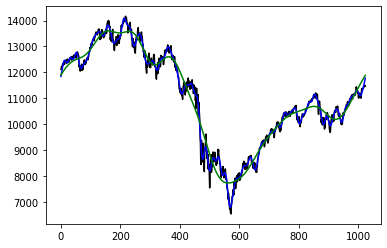

In [5]:
#Exercicio 3
from scipy import loadtxt, zeros, copy, floor
from scipy.fftpack import rfft, irfft
from pylab import plot, show, xlabel, ylabel

#dow = loadtxt("dow.txt", float)
dow = loadtxt("F7exer02.txt", float)
# plot(dow)
# show()

dow_fourier = rfft(dow)
N = len(dow_fourier)
first_10_percent = zeros(N, float)
first_10_percent[0 : int(N / 10)] = copy(dow_fourier[0 : int(N / 10)])
dow_first_10_p = irfft(first_10_percent)
first_2_percent = zeros(N, float)
first_2_percent[0 : int(N / 50)] = copy(dow_fourier[0 : int(N / 50)])
dow_first_2_p =irfft(first_2_percent)

plot(dow, 'k')
plot(dow_first_10_p, 'b')
plot(dow_first_2_p, 'g')
show()

In [ ]:
Exercicio 4
from __future__ import division, print_function
#from os import sys
#sys.path.append('cpresources')
from pylab import *
#from scipy.fftpack import rfft, irfft
from numpy.fft import rfft,irfft
from numpy import linspace

def f(t):	

	if trunc(2*t) % 2==0:
		return 1
	else:
		return -1
		
n = linspace(0,1,1000)
y = array(list(map(f,n)),float)
c = rfft(y)
c[10:]=0
yt = irfft(c)
plot(y)
plot(yt)

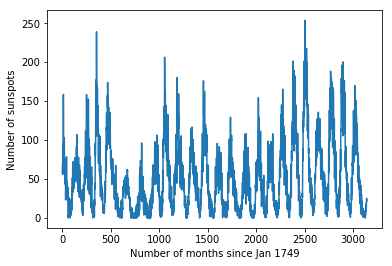

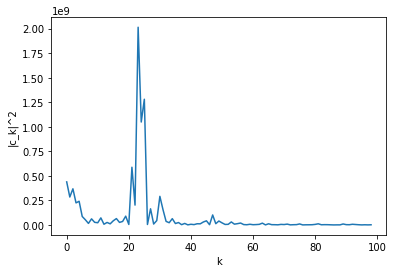

In [7]:
#Exercicio 5
from scipy import loadtxt, exp, zeros, pi
from pylab import plot, show, xlabel, ylabel

sunspot_data = loadtxt("sunspots.txt", float)
time = sunspot_data[:, 0]
sunspots = sunspot_data[:, 1]

## plot sunspot data
plot(time, sunspots)
xlabel('Number of months since Jan 1749')
ylabel('Number of sunspots')
show()

def dft(y):
    N = len(y)
    c = zeros(N // 2 + 1, complex)
    for k in range(N // 2 + 1):
        for n in range(N):
            c[k] += y[n] * exp(-2j * pi * k * n / N)
    return c


## Fourier transform sunspot data
fourier_data = dft(sunspots)

def mag_squared(a):
    return abs(a) ** 2


plot(list(map(mag_squared, fourier_data))[1 : 100])
xlabel('k')
ylabel('|c_k|^2')
show()

## The peak is roughly near k = 21, 22 which is associated with a sine wave of period N / k = 3143 / 21 = 145 months
## which agrees with the sunspot plot above

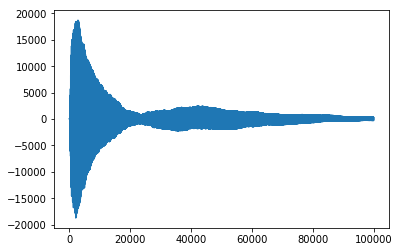

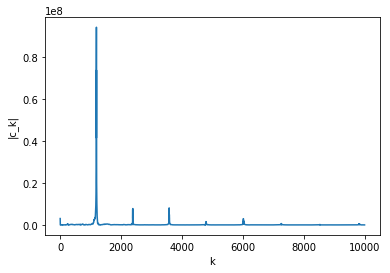

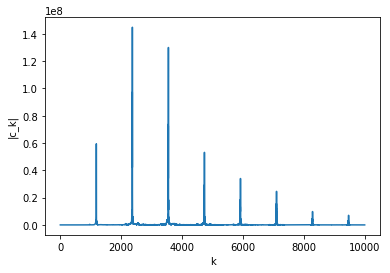

In [2]:
#TPC
from scipy.fftpack import fft
from scipy import loadtxt
from pylab import plot, show, xlabel, ylabel

piano = loadtxt('piano.txt', float)
plot(piano)
show()

piano_fourier = fft(piano)
plot(abs(piano_fourier[0:9999]))
xlabel('k')
ylabel('|c_k|')
show()

trumpet = loadtxt('trumpet.txt', float)
trumpet_fourier = fft(trumpet)
plot(abs(trumpet_fourier[0:9999]))
xlabel('k')
ylabel('|c_k|')
show()

# the frequency associated with k is given by f =  k * (44100 samples/s) / 100000 samples

# Folha_8

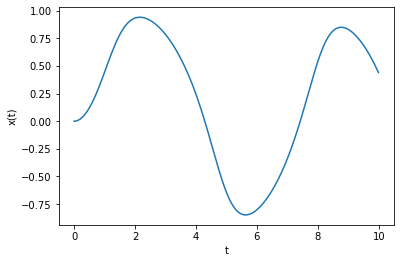

In [9]:
#Exercicio 1 - Metodo de Euler
from math import sin,exp
from numpy import arange, linspace
from pylab import plot,xlabel,ylabel,show

def f(x,t):
    return -x**3+sin(t)

a=0  #começar o intervalo
b=10  #end of the interval
N=1000 #number of steps
h=(b-a)/N #size of a single step , podiamos definir logo o valor de h
x=0 #condiçao incial

tpoints=arange(a,b,h)
xpoints=[]

for t in tpoints:
    xpoints.append(x)
    x+=h*f(x,t)
    
plot(tpoints,xpoints)
xlabel('t')
ylabel('x(t)')
show()


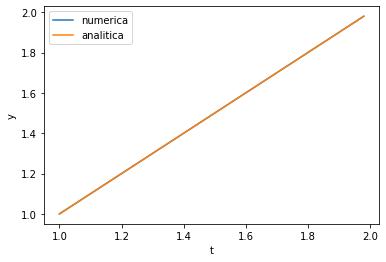

In [25]:
#Exercicio 2
from math import sin,exp
from numpy import arange, linspace
from pylab import plot,xlabel,ylabel,legend,show

def fx(x,t):
    return 3*(1+x)-t

def fy(y,t):
    return 3*t+exp(1-t)
    
a=1 #começa com 1 pois x=1, entao vai começar a contar o x apartir do 1
b=2
N=50
h=(b-a)/N
x=1 #condiçao incial
y=4

tpoints=arange(a,b,h)
xpoints=[]
ypoints=[]
for x in tpoints:
    xpoints.append(x)
    x+=h*fx(x,t)
  #  print(x)
  #  print("______________________")

for y in tpoints:
    ypoints.append(y)
    y+=fy(y,t) #para comparar com a resolução analitica
 #   print(y)
 #   print("-----------------------")

plot(tpoints,xpoints,label='numerica')
plot(tpoints,ypoints,label='analitica')
xlabel('t')
ylabel('y')
legend()
show()

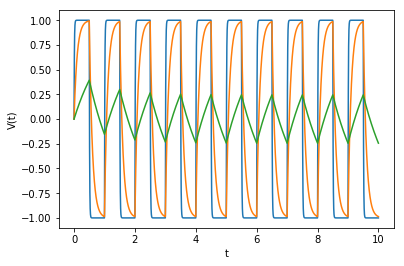

In [2]:
#TPC
from scipy import floor, arange, empty
from pylab import plot, show, xlabel, ylabel

# Solve Vout'(t) = 1 / (RC) * (V_in - V_out) using 4-th order Runge-Kutta

# Constants
V_out_0 = 0
t_initial = 0
t_final = 10
N = 5000  # number of points to use
h = (t_final - t_initial) / N  # step size

def V_in(t):
    if floor(2 * t) % 2 == 0:
        return 1
    else:
        return -1


def f(V, t, RC):
    return 1 / RC * (V_in(t) - V)


def g(RC):
    tpoints = arange(t_initial, t_final, h)
    Vpoints = []
    V = V_out_0
    for t in tpoints:
        Vpoints.append(V)
        k1 = h * f(V, t, RC)
        k2 = h * f(V + 0.5 * k1, t + 0.5 * h, RC)
        k3 = h * f(V + 0.5 * k2, t + 0.5 * h, RC)
        k4 = h * f(V + k3, t + h, RC)
        V +=  (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return Vpoints


t = arange(t_initial, t_final, h)
plot(t, g(0.01))
plot(t, g(0.1))
plot(t, g(1))
xlabel('t')
ylabel('V(t)')
show()

# The cutoff frequThe cutoff frequency is given by ency is given by 1 / (2*pi*RC)